In [ ]:

#The following code is largely inspired amd based upon by Eric Joseph Boccaccio's work for Lab 4: Predator-Prey, designed for the course CMPLXSYS 270, organized by Prof. David Webster Sabin-Miller.
#Special thanks for the above personnel for providing both the coding foundation, as well as all the theoretical guidance.

In [ ]:
import math

class Prey:
  # Initialize the agent properties

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, x_coordinate, y_coordinate, dx, dy, species, cooperativity, energy):
    # Constructor for the Prey class.
    # Initializes a new instance of Prey with the given properties.
    # x_coordinate: The x-coordinate of the prey in the simulation space.
    # y_coordinate: The y-coordinate of the prey in the simulation space.
    # dx: The velocity of the prey along the x-axis.
    # dy: The velocity of the prey along the y-axis.
    # species: The species of the prey.
    # cooperativity: A measure of how cooperative the prey is with others of its kind.
    # energy: The current energy level of the prey.
    self.x_coordinate = x_coordinate
    self.y_coordinate = y_coordinate
    self.dx = dx
    self.dy = dy
    self.species = species
    self.cooperativity = cooperativity
    self.energy = energy


  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, other_x, other_y):
    # Calculates the distance from this prey to another point.
    # other_x: The x-coordinate of the other point.
    # other_y: The y-coordinate of the other point.
    # Returns the Euclidean distance between this prey and the other point.

    dist_x = other_x - self.x_coordinate
    dist_y = other_y - self.y_coordinate
    dist = math.sqrt(dist_x**2 + dist_y**2)
    return dist

In [ ]:
class Predator:
  # Initialize the agent properties
  x_coordinate = 0 # The agent's x coordinate
  y_coordinate = 0 # The agent's y coordinate

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, x_coordinate, y_coordinate, dx, dy, species):
    # Constructor for the Predator class.
    # Initializes a new instance of Predator with the given properties.
    # x_coordinate: The x-coordinate of the predator in the simulation space.
    # y_coordinate: The y-coordinate of the predator in the simulation space.
    # dx: The velocity of the predator along the x-axis.
    # dy: The velocity of the predator along the y-axis.
    # species: The species of the predator.

    self.x_coordinate = x_coordinate
    self.y_coordinate = y_coordinate
    self.dx = dx
    self.dy = dy
    self.species = species

  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, other_x, other_y):
    # Calculates the distance from this predator to another point.
    # Returns the Euclidean distance between this predator and the other point.

    dist_x = other_x - self.x_coordinate
    dist_y = other_y - self.y_coordinate
    dist = math.sqrt(dist_x**2 + dist_y**2)
    return dist

In [ ]:
class Nutrition:
  # Initialize the agent properties
  x_coordinate = 0 # The agent's x coordinate
  y_coordinate = 0 # The agent's y coordinate

  # You can use the __init__() function to set the properties when you make a new agent
  def __init__(self, x_coordinate, y_coordinate, species):
    # Constructor for the Nutrition class.
    # Initializes a new instance of Nutrition with the given properties.
    # x_coordinate: The x-coordinate of the nutrition source in the simulation space.
    # y_coordinate: The y-coordinate of the nutrition source in the simulation space.
    # species: The species or type of the nutrition source.

    self.x_coordinate = x_coordinate
    self.y_coordinate = y_coordinate
    self.species = species

  # This function uses the distance formula to calculate the distance between two coordinates!
  # You probably learned this in middle or high school, but don't worry if you forgot
  def distanceTo(self, other_x, other_y):
    # Calculates the distance from this nutrition source to another point.
    # other_x: The x-coordinate of the other point.
    # other_y: The y-coordinate of the other point.
    # Returns the Euclidean distance between this nutrition source and the other point.

    dist_x = other_x - self.x_coordinate
    dist_y = other_y - self.y_coordinate
    dist = math.sqrt(dist_x**2 + dist_y**2)
    return dist

In [ ]:
global init_pop_preys, init_pop_predators, init_pop_nutrients, prey_reproductive_rate, init_energy, cooperative_level

global prey_visual_range, predator_visual_range

global energy_max, energy_increase


In [ ]:
#This block is used to set up the initial populations of each species(preys), predators, and the food soruces

import random
import copy as cp

# Set the initial populations
init_pop_preys = 150         # Initial number of preys
init_pop_predators = 25     # Initial number of predators
init_pop_nutrients = 90     # Initial number of nutrition sources
nutrition_carrying_capacity = 300  # Maximum number of nutrition sources

#cooperative_level = 0.5      # Level of cooperativity among preys
init_energy = 30            # Initial energy level for preys

prey_reproductive_rate = 0.05  # Reproduction rate of preys
prey_visual_range = 0.2        # Visual range of preys
predator_visual_range = 0.2    # Visual range of predators
prey_coop_range = 1            # Level of cooperation used to modify clustering behaviour of preys



acceleration_hunger = 1.02     # Acceleration due to hunger for predators
acceleration_food = 1.01       # Acceleration towards food for preys
acceleration_fear = 1.03       # Acceleration due to fear for preys

prob_nutrient_generation = 0.1 # Probability of generating new nutrition sources

num_prey_data = []  # List to keep track of prey population over time
num_predator_data = []    # List to keep track of predator population over time
num_nutrients_data = []  # List to keep track of nutrient count over time

energy_max = 30        # Maximum energy level
eatable_range = 0.02   # Range within which nutrition can be eaten
energy_increase = 10   # Energy increase when nutrition is consumed


def initialize():
    # We declare global variables that all of our functions can edit
    global agents, num_preys, num_predators, num_nutrients, cooperative_level

    # Reset the data lists for tracking population
    num_prey_data = []
    num_predator_data = []
    num_nutrients_data = []

    # Set the initial counts for each type of agent
    num_nutrients = init_pop_nutrients
    num_preys = init_pop_preys
    num_predators = init_pop_predators

    # List to store all agents in the simulation
    agents = []

    # Create initial prey population
    for i in range(init_pop_preys): #

        # We set the x and y coordinates of the prey to a random number between 0 and 1
        x_coordinate = random.random()
        y_coordinate = random.random()

        dx = random.uniform(-.05, .05)
        dy = random.uniform(-.05, .05)

        species = "prey"

        cooperativity = prey_coop_range

        energy = init_energy

        new_agent = Prey(x_coordinate, y_coordinate, dx, dy, species, cooperativity, energy)

        # Add this agent to our list of agents
        agents.append(new_agent)

    # Create initial predator population
    for i in range(init_pop_predators):
      # We set the x and y coordinates of the predator to a random number between 0 and 1
        x_coordinate = random.random()
        y_coordinate = random.random()

        dx = random.uniform(-.05, .05)
        dy = random.uniform(-.05, .05)

        species = "predator"
        new_agent = Predator(x_coordinate, y_coordinate, dx, dy, species)
        # Add this agent to our list of agents
        agents.append(new_agent)

    # Create initial nutrition sources
    for i in range(init_pop_nutrients):
      # We set the x and y coordinates of the predator to a random number between 0 and 1
        x_coordinate = random.random()
        y_coordinate = random.random()

        dx = random.uniform(-.05, .05)
        dy = random.uniform(-.05, .05)

        species = "nutrient"
        new_agent = Nutrition(x_coordinate, y_coordinate, species)
        # Add this agent to our list of agents
        agents.append(new_agent)


In [ ]:
#The below code in this block is heavily influenced from Ben Eater and his boids algorithm of simulating bird movement: https://github.com/beneater/boids/blob/master/README.md
#Key ideas and codes related to the clustering behaviour of agents were taken from his boids algorithrim

def clustering(current_agent):
      # The clustering function applies three behaviors typical in flocking: centering, separation, and alignment.
      # These behaviors are applied to the current agent based on its interactions with other agents of the same species.

      # Centering - Move towards the average position of local flockmates
      centeringFactor = 0.8  # Influence of centering behavior based on cooperativity
      centerX = 0  # Average x-coordinate of nearby agents
      centerY = 0  # Average y-coordinate of nearby agents
      num_same_kind = 0  # Number of nearby agents of the same species

      # Calculate the average position of nearby agents of the same species
      for other in agents:
        if other.species == current_agent.species:
          distBetween = current_agent.distanceTo(other.x_coordinate, other.y_coordinate)
          # Check if the other agent is within the visual range and is not the current agent itself
          if distBetween > 0 and distBetween < prey_coop_range:
            centerX += other.x_coordinate
            centerY += other.y_coordinate
            num_same_kind += 1

      # Adjust the current agent's velocity towards the average position
      if num_same_kind != 0:
        centerX = centerX / num_same_kind
        centerY = centerY / num_same_kind

        current_agent.dx += (centerX - current_agent.x_coordinate) * centeringFactor
        current_agent.dy += (centerY - current_agent.y_coordinate) * centeringFactor


      # Separation - Avoid crowding local flockmates
      minDistance = 0.1  # Minimum desired separation distance
      avoidFactor = 0.05  # Influence of separation behavior

      moveX = 0  # Adjustment in x-velocity for separation
      moveY = 0  # Adjustment in y-velocity for separation

      # Calculate the necessary velocity adjustments to maintain separation
      for other in agents:
        if other.species == current_agent.species:
          distBetween = current_agent.distanceTo(other.x_coordinate, other.y_coordinate)
          # Ensure that it is not itself then check whether if it's in range
          if distBetween > 0 and distBetween < prey_coop_range:
            moveX += current_agent.x_coordinate - other.x_coordinate
            moveY += current_agent.y_coordinate - other.y_coordinate

      # Apply the separation adjustments to the current agent's velocity
      current_agent.dx += moveX * avoidFactor;
      current_agent.dy += moveY * avoidFactor;



      # Alignment - Align velocity with local flockmates
      matchingFactor = 0.8  # Influence of alignment behavior

      avgDX = 0  # Average x-velocity of nearby agents
      avgDY = 0  # Average y-velocity of nearby agents
      num_same_kind = 0  # Number of nearby agents of the same species

      # Calculate the average velocity of nearby agents
      for other in agents:
        if other.species == current_agent.species:
          distBetween = current_agent.distanceTo(other.x_coordinate, other.y_coordinate)
          #First ensure that it is not itself then check whether if it's in range
          if distBetween > 0 and distBetween < prey_coop_range:
            avgDX += other.x_coordinate
            avgDY += other.y_coordinate
            num_same_kind += 1

      # Adjust the current agent's velocity to align with the average
      if num_same_kind != 0:
          avgDX = avgDX / num_same_kind
          avgDY = avgDY / num_same_kind

          current_agent.dx += (avgDX - current_agent.dx) * matchingFactor
          current_agent.dy += (avgDY - current_agent.dy) * matchingFactor


      # Limit speed - Ensure the agent's speed does not exceed a maximum limit
      speedLimit = 0.03  # Maximum speed
      speed = math.sqrt(current_agent.dx**2 + current_agent.dy**2)  # Current speed

       # If the current speed exceeds the limit, scale down the velocity
      if speed > speedLimit :
        current_agent.dx = (current_agent.dx / speed) * speedLimit
        current_agent.dy = (current_agent.dy / speed) * speedLimit

to get the prey on top of the
velocity adjustmneents of dx and dy, get the magnitude of dx and dy and divide by it and multip;ly by maximum speed to recalculate the velocity vector.
Dx and Dy, velocity vector to see how long (pythagoren theorem), and we have to rescale it back to 1 (divide it and multiply by max speed)
- if broken into componenets, do not need angle
- only needs arc tan if they only see a limited amount of
for each creature, you have to make a list of creatures that are close enough and average the positions, including urself, and the point you are going to is the new center
- go towards center, add the average vectors
have to do diff term for dx and dy difference (diffd)
to go the opposite direction, negate it and add all the negative diffx diffy for all the predators in the range, and multiply by factor.
at the end of timestep, we have to
vx and vy are

In [ ]:
def run_from_predators(current_agent):
    # This function calculates the prey's response when it needs to escape from nearby predators.
    # It adjusts the prey's velocity based on the positions of nearby predators to simulate a fear response.

    global acceleration_fear  # Global variable representing the acceleration due to fear.

    sum_diff_x = 0  # Sum of x-coordinate differences between the prey and each predator.
    sum_diff_y = 0  # Sum of y-coordinate differences between the prey and each predator.

    # Iterate through all agents to identify predators and calculate their relative positions.
    for predator in agents:
        if predator.species == "predator":
            # Calculate the Euclidean distance between the prey and the predator.
            distBetween = math.sqrt((current_agent.x_coordinate - predator.x_coordinate)**2 +
                                    (current_agent.y_coordinate - predator.y_coordinate)**2)

            # Check if the predator is within the prey's visual range.
            if distBetween < prey_visual_range:
                # Accumulate the differences in position between the prey and the predator.
                sum_diff_x += (predator.x_coordinate - current_agent.x_coordinate)
                sum_diff_y += (predator.y_coordinate - current_agent.y_coordinate)

    # Adjust the prey's velocity to move away from the predators.
    # The adjustment is proportional to the accumulated position differences and the fear acceleration factor.
    current_agent.dx += -sum_diff_x * acceleration_fear
    current_agent.dy += -sum_diff_y * acceleration_fear

    # Calculate the current speed of the prey using the Pythagorean theorem.
    speed = math.sqrt(current_agent.dx**2 + current_agent.dy**2)

    # Limit the speed of the prey to a maximum value (speedLimit).
    speedLimit = 0.03  # Define the maximum speed limit for the prey.
    if speed > speedLimit:
        # If the current speed exceeds the limit, scale the velocity vector to the maximum speed.
        # This maintains the direction of the velocity while capping the speed.
        current_agent.dx = (current_agent.dx / speed) * speedLimit
        current_agent.dy = (current_agent.dy / speed) * speedLimit




In [ ]:
def go_to_preys(current_agent):
    # This function defines the behavior of a predator moving towards prey.
    # It adjusts the predator's velocity based on the positions of nearby preys.

    global acceleration_hunger  # The acceleration factor due to the predator's hunger.

    sum_diff_x = 0  # Sum of differences in x-coordinates between predator and preys.
    sum_diff_y = 0  # Sum of differences in y-coordinates between predator and preys.

    # Iterate through all agents to find preys and calculate the distance to them.
    for prey in agents:
        # Check if the agent is a prey.
        if prey.species == "prey":
            # Calculate the Euclidean distance between the current predator and the prey.
            distBetween = math.sqrt((current_agent.x_coordinate - prey.x_coordinate)**2 +
                                    (current_agent.y_coordinate - prey.y_coordinate)**2)

            # Check if the prey is within the predator's visual range.
            if distBetween < predator_visual_range:
                # Accumulate the differences in position between the predator and the prey.
                sum_diff_x += (prey.x_coordinate - current_agent.x_coordinate)
                sum_diff_y += (prey.y_coordinate - current_agent.y_coordinate)

    # Adjust the predator's velocity to move towards the preys.
    # The adjustment is proportional to the accumulated position differences and the hunger acceleration factor.
    current_agent.dx += sum_diff_x * acceleration_hunger
    current_agent.dy += sum_diff_y * acceleration_hunger

    # Calculate the current speed of the predator using the Pythagorean theorem.
    speed = math.sqrt(current_agent.dx**2 + current_agent.dy**2)

    # Limit the speed of the predator to a maximum value (speedLimit).
    speedLimit = 0.05  # Define the maximum speed limit for the predator.
    if speed > speedLimit:
        # If the current speed exceeds the limit, scale the velocity vector to the maximum speed.
        # This maintains the direction of the velocity while capping the speed.
        current_agent.dx = (current_agent.dx / speed) * speedLimit
        current_agent.dy = (current_agent.dy / speed) * speedLimit



In [ ]:
def go_to_nutrition(current_agent):
    # This function defines the behavior of a prey moving towards a nutrition source.
    # It adjusts the prey's velocity based on the positions of nearby nutrition sources.

    global acceleration_food  # The acceleration factor due to the prey's need for food.

    sum_diff_x = 0  # Sum of differences in x-coordinates between prey and nutrition sources.
    sum_diff_y = 0  # Sum of differences in y-coordinates between prey and nutrition sources.

    # Iterate through all agents to find nutrition sources and calculate the distance to them.
    for nutrition in agents:
        # Check if the agent is a nutrition source.
        if nutrition.species == "nutrient":
            # Calculate the Euclidean distance between the current prey and the nutrition source.
            distBetween = current_agent.distanceTo(nutrition.x_coordinate, nutrition.y_coordinate)

            # Check if the nutrition source is within the prey's visual range.
            if distBetween < prey_visual_range:
                # Accumulate the differences in position between the prey and the nutrition source.
                sum_diff_x += (nutrition.x_coordinate - current_agent.x_coordinate)
                sum_diff_y += (nutrition.y_coordinate - current_agent.y_coordinate)

    # Adjust the prey's velocity to move towards the nutrition sources.
    # The adjustment is proportional to the accumulated position differences and the food acceleration factor.
    current_agent.dx += sum_diff_x * acceleration_food
    current_agent.dy += sum_diff_y * acceleration_food

    # Calculate the current speed of the prey using the Pythagorean theorem.
    speed = math.sqrt(current_agent.dx**2 + current_agent.dy**2)

    # Limit the speed of the prey to a maximum value (speedLimit).
    speedLimit = 0.03  # Define the maximum speed limit for the prey.
    if speed > speedLimit:
        # If the current speed exceeds the limit, scale the velocity vector to the maximum speed.
        # This maintains the direction of the velocity while capping the speed.
        current_agent.dx = (current_agent.dx / speed) * speedLimit
        current_agent.dy = (current_agent.dy / speed) * speedLimit


In [ ]:
def movement(current_agent):
    # This function defines the movement behavior for each agent (prey, predator, or nutrition) in the simulation.

    # Check if the agent is a Prey
    if isinstance(current_agent, Prey):
        # First, check for nearby predators and run away if any are detected.
        predator_nearby = False
        for agent in agents:
            if isinstance(agent, Predator):
                distance_to_predator = current_agent.distanceTo(agent.x_coordinate, agent.y_coordinate)
                # If a predator is within the prey's visual range, trigger the escape behavior.
                if distance_to_predator < prey_visual_range:
                    predator_nearby = True
                    run_from_predators(current_agent)
                    break  # Break the loop after responding to the first nearby predator.

        # If no predator is nearby, check for nearby nutrition sources.
        if not predator_nearby:
            nutrition_nearby = False
            for agent in agents:
                if isinstance(agent, Nutrition):
                    distance_to_nutrition = current_agent.distanceTo(agent.x_coordinate, agent.y_coordinate)
                    # If a nutrition source is within the prey's visual range, move towards it.
                    if distance_to_nutrition < prey_visual_range:
                        nutrition_nearby = True
                        go_to_nutrition(current_agent)
                        break  # Only move towards one nutrition source at a time.

            # If no nutrition is nearby, perform clustering behavior with other preys.
            if not nutrition_nearby:
                clustering(current_agent)

        # After moving, decrease the prey's energy.
        current_agent.energy -= 1
        # Update the prey's position based on its velocity, wrapping around the edges.
        current_agent.x_coordinate = (current_agent.x_coordinate + current_agent.dx) % 1.0
        current_agent.y_coordinate = (current_agent.y_coordinate + current_agent.dy) % 1.0

    # Predator behavior
    elif isinstance(current_agent, Predator):
        # If there are preys, move towards them.
        go_to_preys(current_agent)
        # Update the predator's position based on its velocity, wrapping around the edges.
        current_agent.x_coordinate = (current_agent.x_coordinate + current_agent.dx) % 1.0
        current_agent.y_coordinate = (current_agent.y_coordinate + current_agent.dy) % 1.0

    # Nutrition sources do not have movement behavior.
    elif isinstance(current_agent, Nutrition):
        pass



In [ ]:
def count_predators(current_agent):
    # This function counts the number of predators within a certain radius of the current agent.
    predator_count = 0  # Initialize the counter for the number of nearby predators.

    # Loop through all agents in the simulation.
    for agent in agents:
        # Check if the agent is a predator.
        if agent.species == "predator":
            # Calculate the distance between the current agent and the predator.
            distance_away = current_agent.distanceTo(agent.x_coordinate, agent.y_coordinate)

            # Check if the predator is within a specified radius (e.g., 0.02 units).
            if distance_away < .02:  # Radius within which we consider an agent to be a neighbor.
                predator_count += 1  # Increment the count of nearby predators.

    # Return the total number of predators found within the specified radius of the current agent.
    return predator_count

In [ ]:
def count_preys(current_agent):
    # This function counts the number of preys within a certain radius of the current agent.
    prey_count = 0  # Initialize the counter for the number of nearby preys.

    # Loop through all agents in the simulation.
    for agent in agents:
        # Check if the agent is a prey.
        if agent.species == "prey":
            # Calculate the distance between the current agent and the prey.
            distance_away = current_agent.distanceTo(agent.x_coordinate, agent.y_coordinate)

            # Check if the prey is within a specified radius (e.g., 0.02 units).
            if distance_away < .02:  # Radius within which we consider an agent to be a neighbor.
                prey_count += 1  # Increment the count of nearby preys.

    # Return the total number of preys found within the specified radius of the current agent.
    return prey_count


In [ ]:
def nutrient_generation(agent):
    # This function generates new nutrition sources in the simulation.
    global prob_nutrient_generation, nutrition_carrying_capacity, num_nutrients

    current_x_coordinate = agent.x_coordinate
    current_y_coordinate = agent.y_coordinate

    # Check if the total number of nutrients is below the carrying capacity.
    if num_nutrients < nutrition_carrying_capacity:
      # Randomly decide whether to create a new nutrient based on the generation probability.
      if random.random() < prob_nutrient_generation:
        # Generate a new position for a potential new nutrient source.
        new_nutrient_x_coordinate = (current_x_coordinate + random.uniform(-.08, .08) )% 1.0
        new_nutrient_y_coordinate = (current_y_coordinate + random.uniform(-.08, .08) )% 1.0
        # Create a new nutrient and add it to the agents list.
        nutrient = Nutrition(new_nutrient_x_coordinate, new_nutrient_y_coordinate, "nutrient")
        agents.append(nutrient)
        num_nutrients += 1

In [ ]:
def species_rules(current_agent):
    # This function defines the rules for each species' behavior in the simulation.
    global agents, num_preys, num_nutrients

    # Move the current agent according to its species-specific behavior.
    movement(current_agent)

    # Behavior rules for prey agents.
    if current_agent.species == "prey":
        # Count the number of nearby predators.
        predator_count = count_predators(current_agent)

        # If predators are nearby, there's a chance the prey will be removed (simulating being caught).
        if predator_count > 0 and random.random() < .95:
            agents.remove(current_agent)
            num_preys -= 1
            return

        # Remove the prey if its energy drops to zero or below.
        if current_agent.energy <= 0:
            agents.remove(current_agent)
            num_preys -= 1

        # Reproduction: Preys with sufficient energy can reproduce.
        elif current_agent.energy > 12 and random.random() < prey_reproductive_rate:
            prey_baby = cp.copy(current_agent)
            agents.append(prey_baby)
            num_preys += 1

    # Behavior rules for nutrient agents.
    elif current_agent.species == "nutrient":
        # Find preys within the eatable range of the nutrient.
        prey_in_range = [agent for agent in agents if agent.species == "prey" and
                         current_agent.distanceTo(agent.x_coordinate, agent.y_coordinate) < eatable_range]

        # Distribute energy to preys and remove the nutrient.
        if prey_in_range:
            energy_per_prey = energy_increase / len(prey_in_range)
            for prey in prey_in_range:
                prey.energy += energy_per_prey
            agents.remove(current_agent)
            num_nutrients -= 1

        # Generate new nutrients.
        nutrient_generation(current_agent)


In [ ]:
def update():
    # This function updates the state of the simulation at each timestep.
    global agents, num_preys, num_predators, num_nutrients, num_prey_data, num_predator_data, num_nutrients_data

    # Only proceed if there are agents in the simulation.
    if agents:
        # Randomize the order of agents to ensure fairness.
        random.shuffle(agents)

        # Apply species-specific rules to each agent.
        for current_agent in agents:
            species_rules(current_agent)

        # Update the counts of each species.
        num_preys = sum(agent.species == "prey" for agent in agents)
        num_predators = sum(agent.species == "predator" for agent in agents)
        num_nutrients = sum(agent.species == "nutrient" for agent in agents)

        # Record the current population sizes.
        num_prey_data.append(num_preys)
        num_predator_data.append(num_predators)
        num_nutrients_data.append(num_nutrients)


The below code is used purely for visualization

In [ ]:
import matplotlib.pyplot as plt

def observe():
    # This function visualizes the current state of the simulation.
    global agents, num_prey_data, num_predator_data, num_nutrients_data, current_timestep

    # Create a figure with two subplots: one for the agents' positions and one for population over time.
    fig, axes = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [3, 1]})
    ax = axes.flatten()  # Flatten the axes array for easy access.

    # Define markers for different species.
    species_dict = {'prey': 'b.', 'predator': 'ro', 'nutrient': 'g*'}
    for species, marker in species_dict.items():
        # Gather members of each species.
        members = [ag for ag in agents if ag.species == species]
        if members:
            # Extract x and y coordinates of each member.
            x = [ag.x_coordinate for ag in members]
            y = [ag.y_coordinate for ag in members]
            # Plot the positions of the members on the first subplot.
            ax[0].plot(x, y, marker)

    # Set the axis limits for the position plot.
    ax[0].axis([0, 1, 0, 1])

    # Plot the population data on the second subplot.
    ax[1].plot(num_prey_data, label='prey')
    ax[1].plot(num_predator_data, label='predator')
    ax[1].plot(num_nutrients_data, label='nutrient')
    ax[1].legend()  # Add a legend.

    # Set the size of the figure and add a title.
    fig.set_figwidth(6)
    fig.set_figheight(8)
    fig.suptitle("Current Timestep: " + str(current_timestep + 1))


In [ ]:
from IPython import display
import time

def run_animation():
    # This function runs the simulation and animates the results.
    global current_timestep, num_prey_data, num_predator_data, winner

    max_timesteps = 80  # Set the maximum number of timesteps for the simulation.
    initialize()  # Initialize the simulation.
    winner = "None"  # Initialize the winner variable.

    # Iterate over each timestep.
    for current_timestep in range(max_timesteps):
        update()  # Update the state of the simulation.
        plt.close()  # Close the current plot.
        observe()  # Visualize the current state.

        # Display the plot and clear the output to create an animation effect.
        display.clear_output(wait=True)
        display.display(plt.gcf())
        # time.sleep(0.5)  # Uncomment to add a delay between frames.

    plt.close()  # Close the plot after the simulation.

    # Print the final population sizes.
    print("The coop_range level was", prey_coop_range)
    print("prey_pop:", num_preys)
    print("nutrient_pop:", num_nutrients)




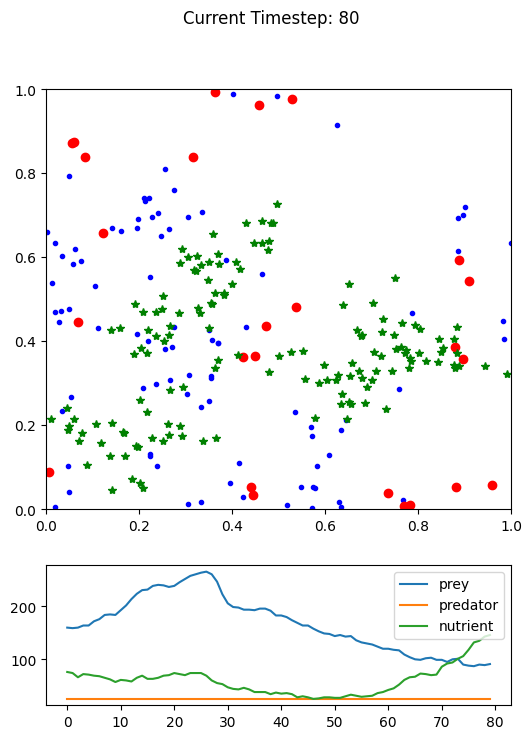

The coop_range level was 1.4
prey_pop: 91
nutrient_pop: 146


In [ ]:
# Run animation for our simulation
run_animation()